# **Data Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
coviddf = pd.read_csv('https://github.com/nwagner7/bsan6070/blob/main/covid_county.csv?raw=true')

In [ ]:
coviddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   county                             58 non-null     object 
 1   population                         58 non-null     int64  
 2   median_income                      58 non-null     int64  
 3   median_age                         58 non-null     float64
 4   obesity_rate                       58 non-null     float64
 5   cvd_rate                           58 non-null     float64
 6   total_doses                        58 non-null     int64  
 7   pfizer_doses                       58 non-null     int64  
 8   moderna_doses                      58 non-null     int64  
 9   jj_doses                           58 non-null     int64  
 10  partially_vaccinated               58 non-null     int64  
 11  fully_vaccinated                   58 non-null     int64  
 

In [ ]:
coviddf.head()

,county,population,median_income,median_age,obesity_rate,cvd_rate,total_doses,pfizer_doses,moderna_doses,jj_doses,partially_vaccinated,fully_vaccinated,at_least_one_dose,percentage_of_county_at_least_one
0,Alameda,1670000,102125,37.6,0.196,0.0450,1491643,883191,522834,85618,858077,630981,943993,0.565265
1,Alpine,1146,64688,44.3,0.225,0.0437,1441,41,1393,7,806,633,814,0.710297
2,Amador,37829,61198,50.5,0.251,0.0572,27280,6177,20445,658,16719,10487,17447,0.461207
3,Butte,227075,48443,37.1,0.258,0.0651,138465,60109,73426,4930,75150,63054,80093,0.352716
4,Calaveras,45235,58151,52.1,0.230,0.0394,30252,11608,18086,558,17114,12975,17801,0.393523


In [ ]:
coviddf.isnull().sum() #check for null values


county                               0
population                           0
median_income                        0
median_age                           0
obesity_rate                         0
cvd_rate                             0
total_doses                          0
pfizer_doses                         0
moderna_doses                        0
jj_doses                             0
partially_vaccinated                 0
fully_vaccinated                     0
at_least_one_dose                    0
percentage_of_county_at_least_one    0
dtype: int64

In [ ]:
coviddf.duplicated().sum()

0

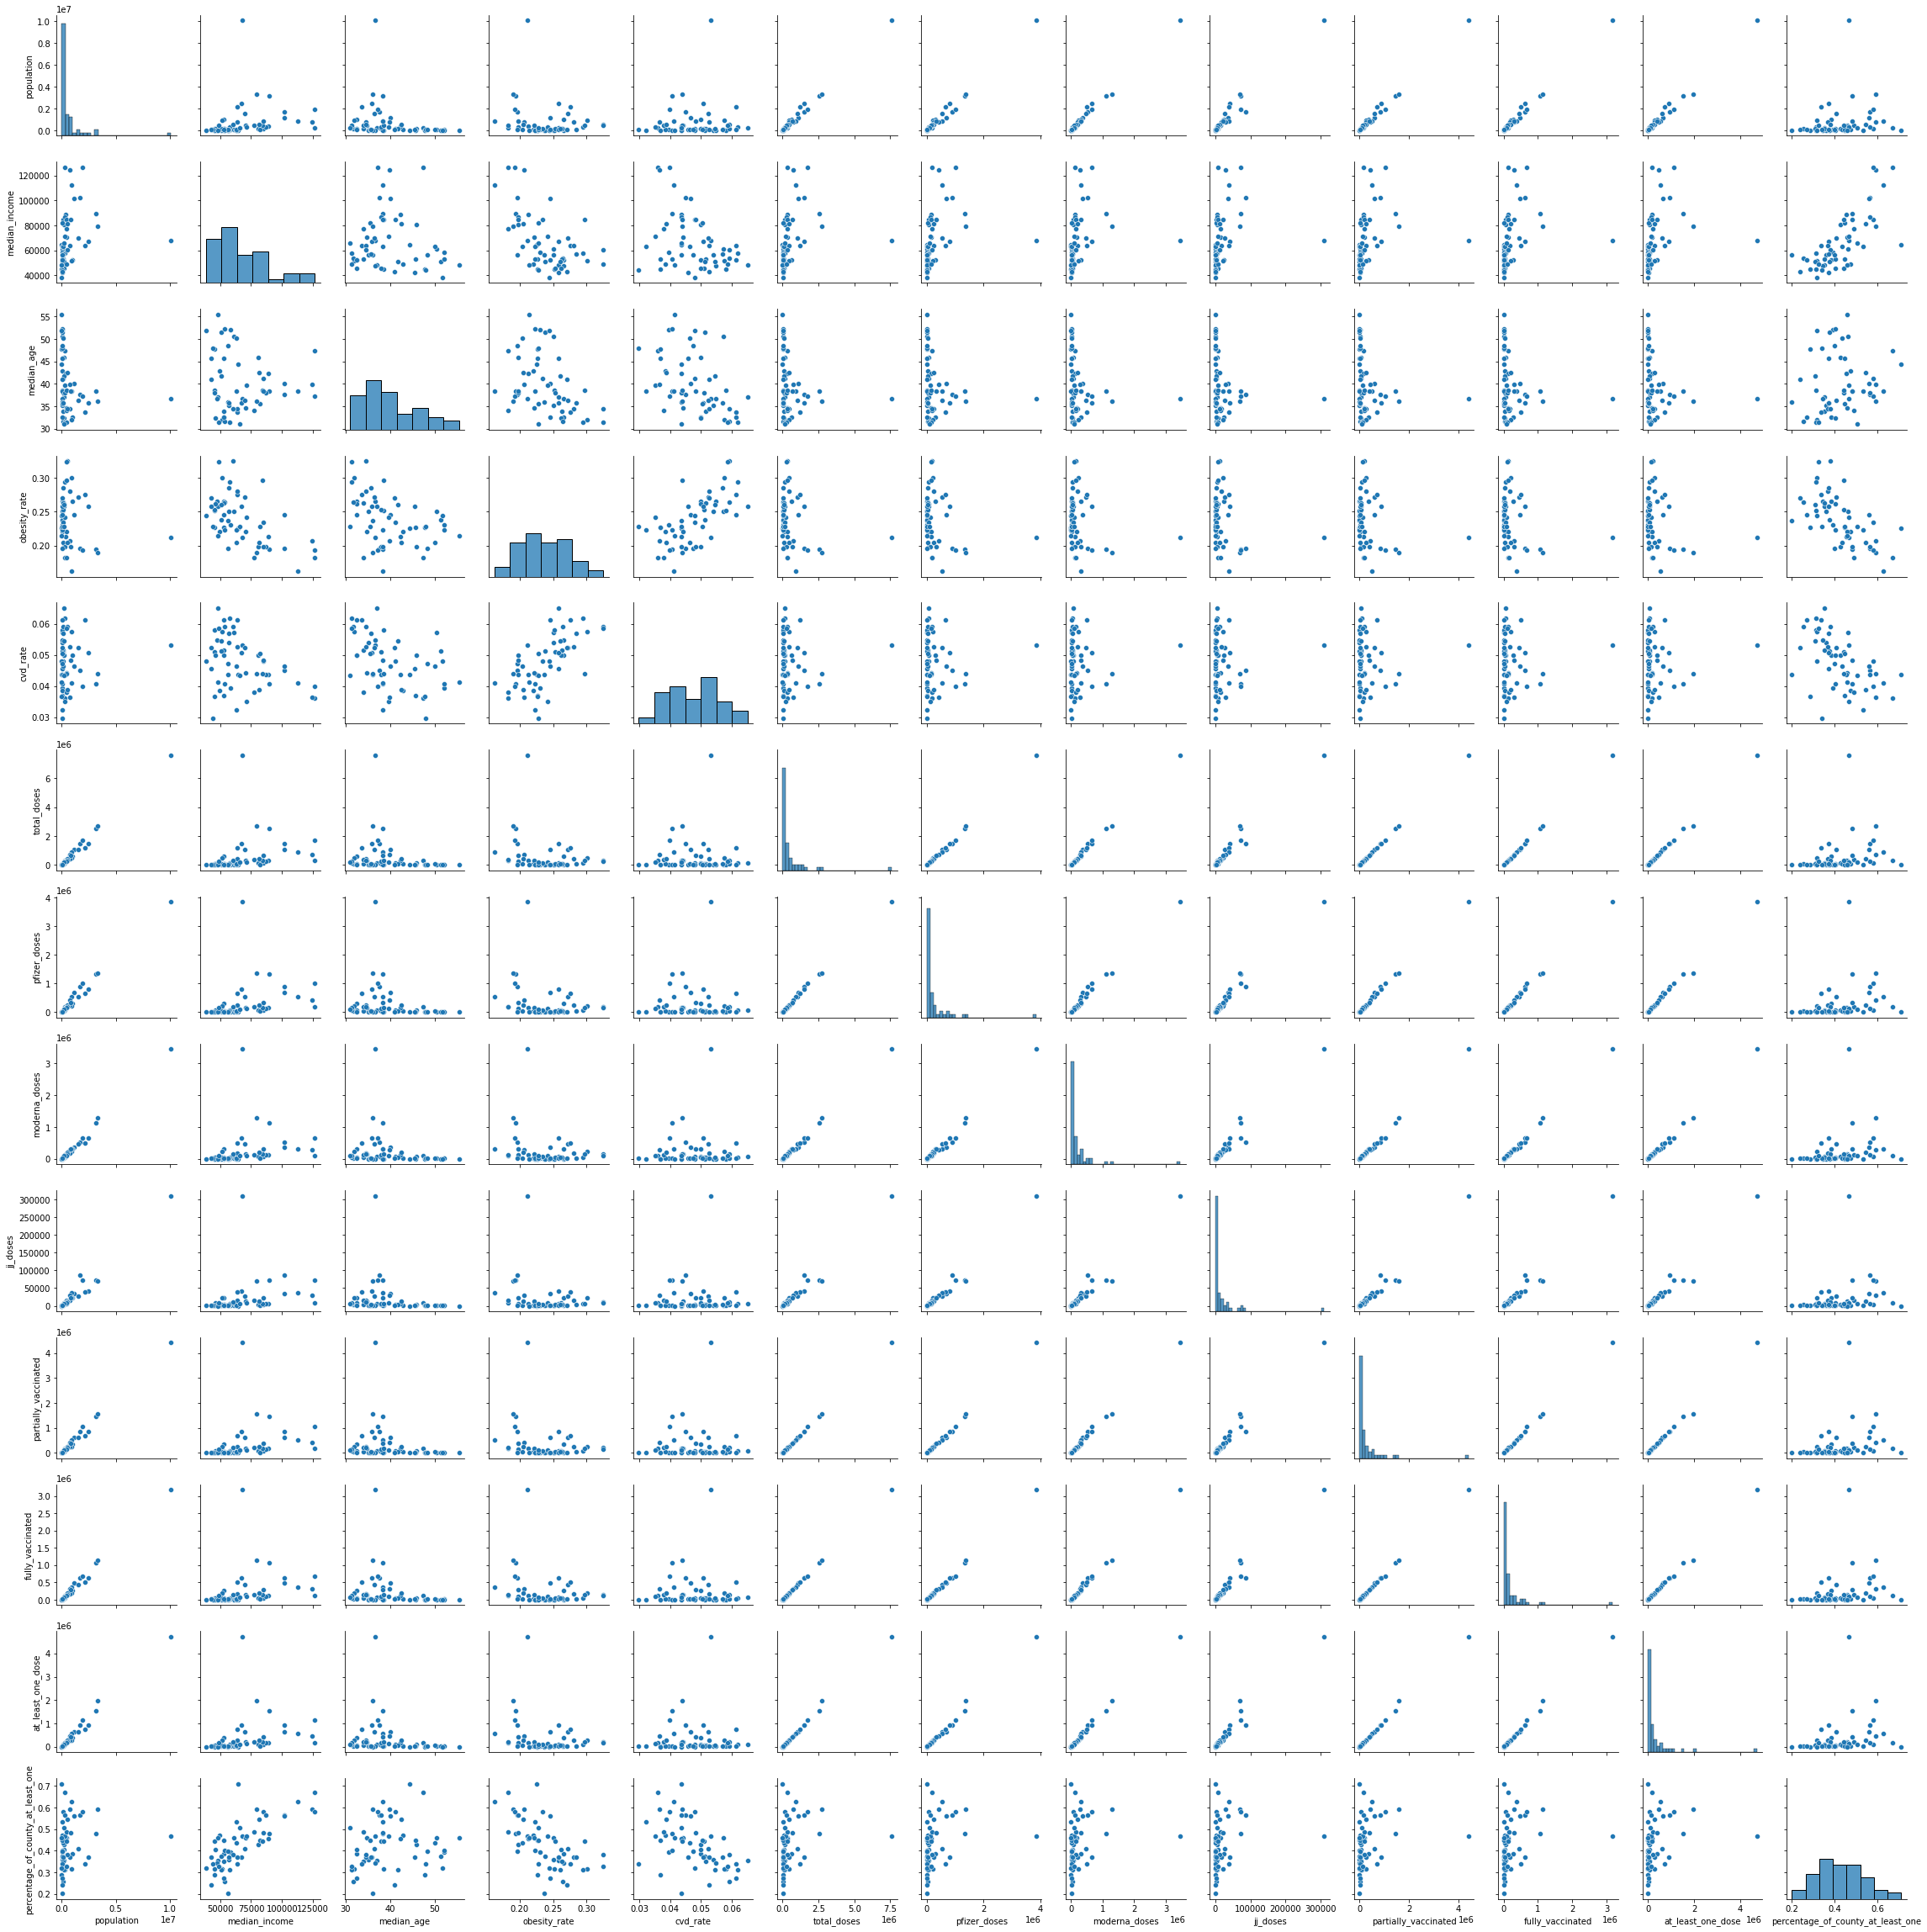

In [ ]:
#Use seaborn to create pairplots 
sns.pairplot(data=coviddf)
plt.savefig('pairplots.png')

In [ ]:
# Correlation Matrix
corr_matrix = coviddf.corr()
high_corr = corr_matrix[corr_matrix >= 0.6]
high_corr

,population,median_income,median_age,obesity_rate,cvd_rate,total_doses,pfizer_doses,moderna_doses,jj_doses,partially_vaccinated,fully_vaccinated,at_least_one_dose,percentage_of_county_at_least_one
population,1.000000,NaN,NaN,NaN,NaN,0.994687,0.990535,0.995182,0.976225,0.994396,0.994804,0.991594,NaN
median_income,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742576
median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
obesity_rate,NaN,NaN,NaN,1.000000,0.649753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cvd_rate,NaN,NaN,NaN,0.649753,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_doses,0.994687,NaN,NaN,NaN,NaN,1.000000,0.998313,0.997472,0.983358,0.999927,0.999857,0.998528,NaN
pfizer_doses,0.990535,NaN,NaN,NaN,NaN,0.998313,1.000000,0.991764,0.983399,0.998362,0.998010,0.996426,NaN
moderna_doses,0.995182,NaN,NaN,NaN,NaN,0.997472,0.991764,1.000000,0.976028,0.997216,0.997579,0.996818,NaN
jj_doses,0.976225,NaN,NaN,NaN,NaN,0.983358,0.983399,0.976028,1.000000,0.983758,0.982462,0.978089,NaN
partially_vaccinated,0.994396,NaN,NaN,NaN,NaN,0.999927,0.998362,0.997216,0.983758,1.000000,0.999580,0.998583,NaN


# **Model Feature Selection & Creation**

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
coviddf.columns #see what all the columns are

Index(['county', 'population', 'median_income', 'median_age', 'obesity_rate',
       'cvd_rate', 'total_doses', 'pfizer_doses', 'moderna_doses', 'jj_doses',
       'partially_vaccinated', 'fully_vaccinated', 'at_least_one_dose',
       'percentage_of_county_at_least_one'],
      dtype='object')

In [ ]:
#split dataset in features and target variable
feature_cols = [ 'population', 'median_income', 'median_age', 'obesity_rate',
       'cvd_rate', 'total_doses', 'pfizer_doses', 'moderna_doses', 'jj_doses',
       'partially_vaccinated', 'fully_vaccinated', 'at_least_one_dose']
X = coviddf[feature_cols] # Features
y = coviddf.percentage_of_county_at_least_one # Target variable

In [ ]:
# split dataset into train set: independent (X_train) and dependent (y_train)
# and test set: independent (X_test) and dependent (y_test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=23)

In [ ]:
import seaborn as sns


In [ ]:
#fit model
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [ ]:
#Find R-squared goal
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))


R squared: 0.6943314631469099


In [ ]:
#Mean of Residuals
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals)) #result is good because its closer to zero

Mean of Residuals -2.9046532621007005e-16


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


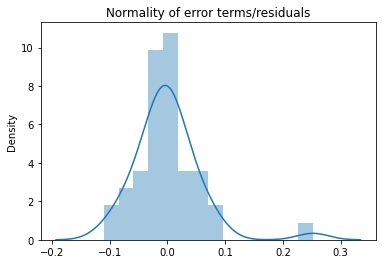

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals') # doesnt seem to be normal, assumption is because of outliers

In [ ]:
#A way to calculate residuals for upcoming function
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [ ]:
#lets check again with other formula thats more clear
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.00905102339194101
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


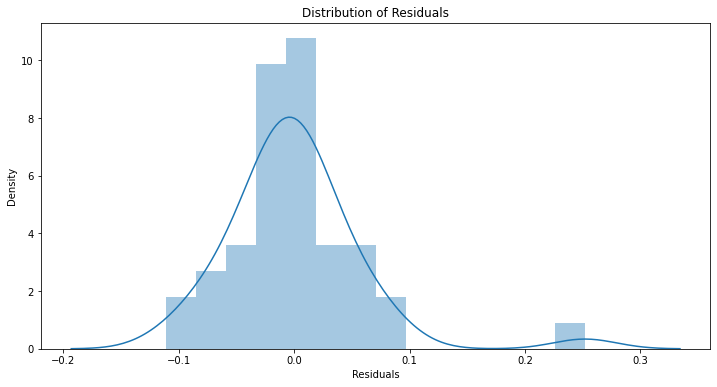


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(regr,X_train,y_train) #now its clear assumption not satisfied, we have to fix this

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


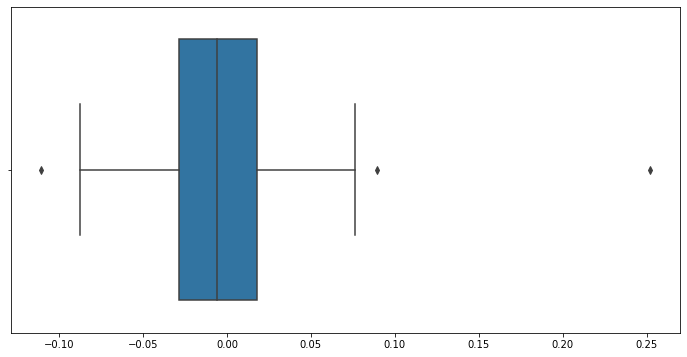

In [ ]:
##checking for outliers as a potential fix
plt.figure(figsize=(12,6))
sns.boxplot(residuals)


In [ ]:
#remove outliers
Q1 = coviddf.quantile(0.25)
Q3 = coviddf.quantile(0.75)
IQR = Q3 - Q1

df = coviddf[~((coviddf < (Q1 - 1.5 * IQR)) |(coviddf > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#now we repear everything with NEW DATASET "df"

#split dataset in features and target variable
feature_cols = [ 'population', 'median_income', 'median_age', 'obesity_rate',
       'cvd_rate', 'total_doses', 'pfizer_doses', 'moderna_doses', 'jj_doses',
       'partially_vaccinated', 'fully_vaccinated', 'at_least_one_dose']
X2 = df[feature_cols] # Features
y2 = df.percentage_of_county_at_least_one # Target variable

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.40, random_state=23)

In [ ]:
#fit model_2
regr2 = LinearRegression()
regr2.fit(X_train2,y_train2)
y_pred2 = regr2.predict(X_train2)


In [ ]:
#Mean of Residuals of new model
residuals2 = y_train2.values-y_pred2
mean_residuals = np.mean(residuals2)
print("Mean of Residuals {}".format(mean_residuals)) #result is good because its closer to zero, even better than before

Mean of Residuals 1.3183898417423734e-16


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.42779685677138074
Residuals are normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


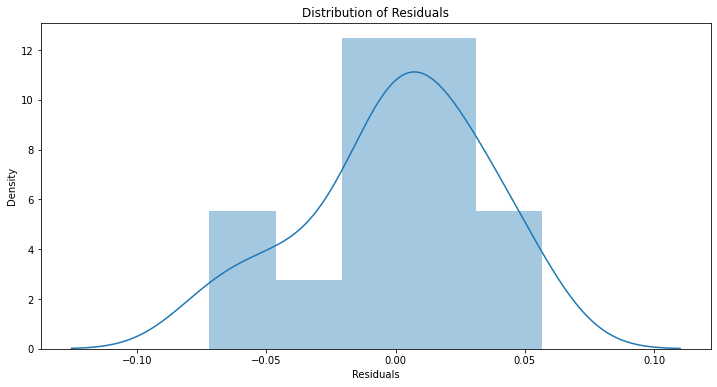


Assumption satisfied


In [ ]:
#running with new model now fixed the
normal_errors_assumption(regr2,X_train2,y_train2)

0.9675252159712101

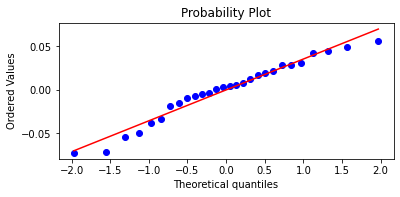

In [ ]:
#checking if it worked and it did
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals2, plot=ax, fit=True)
r**2

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


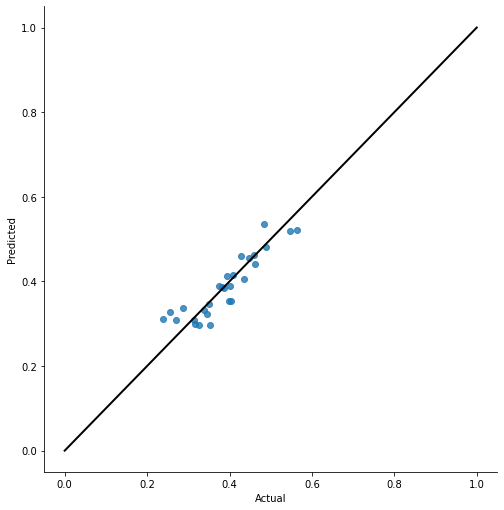

In [ ]:
#check linear assumption
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.show()

linear_assumption(regr2, X_train2, y_train2)



In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(regr2, X_train2, y_train2)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.419410921549667
Little to no autocorrelation 

Assumption satisfied


In [ ]:
#Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals2, X_train2)
lzip(name, test)


#Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

[('F statistic', 6.041221771977636), ('p-value', 0.08688558498602504)]

In [ ]:
#Evaluate Model 

y_predict = regr2.predict(X2)
rmse = (np.sqrt(mean_squared_error(y2, y_predict)))
r2_data = r2_score(y2, y_predict)
print("The model performance for whole set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2_data))
print("\n")


# model evaluation for training set
y_train_predict = regr2.predict(X_train2)
rmse = (np.sqrt(mean_squared_error(y_train2, y_train_predict)))
r2 = r2_score(y_train2, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regr2.predict(X_test2)
rmse = (np.sqrt(mean_squared_error(y_test2, y_test_predict)))
r2 = r2_score(y_test2, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for whole set
--------------------------------------
RMSE is 0.07347359226619564
R2 score is 0.33834442465795367


The model performance for training set
--------------------------------------
RMSE is 0.034040171467101026
R2 score is 0.8178672225954873


The model performance for testing set
--------------------------------------
RMSE is 0.10791780500020667
R2 score is -0.16175039503734245


Not the best performing model

# KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X, y)
print(f'all data score: {reg.score(X, y)}')
#scoring training data
print(f'training data score: {reg.score(X_train, y_train)}')


all data score: 0.6872539397456994
training data score: 0.6362986255707282


# RandomForestRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
clf = RandomForestRegressor(n_estimators=100, max_features="auto", random_state=0)

clf.fit(X, y)

y_pred = clf.predict(X)
#scoring all data
print(f'all data score: {clf.score(X, y)}')

#scoring training data
print(f'training data score: {clf.score(X_train, y_train)}')

all data score: 0.9380975957642371
training data score: 0.9392323171794863


# AdaBoostRegressor

In [ ]:
clf2 = AdaBoostRegressor(n_estimators=100)
clf2.fit(X_train,y_train)

#scoring
print(f'all data score: {clf2.score(X, y)}')

print(f'training data score: {clf2.score(X_train, y_train)}')

all data score: 0.7845862423728043
training data score: 0.937579678594602


# GradientBoostingRegressor

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth = 2,
    n_estimators =3,
    learning_rate=1.0
)

regressor.fit(X_train,y_train)

#scoring
print(f'all data score: {regressor.score(X, y)}')
print(f'training data score: {regressor.score(X_train, y_train)}')



all data score: 0.685921992521616
training data score: 0.8913536909856346
